# Cat and Dog Classifier 

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action='ignore')

In [7]:
train_dir = "cats_and_dogs/train"
validation_dir = "cats_and_dogs/validation"
test_dir = "cats_and_dogs/test"

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory( validation_dir,
                                                   target_size=(150, 150),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [11]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

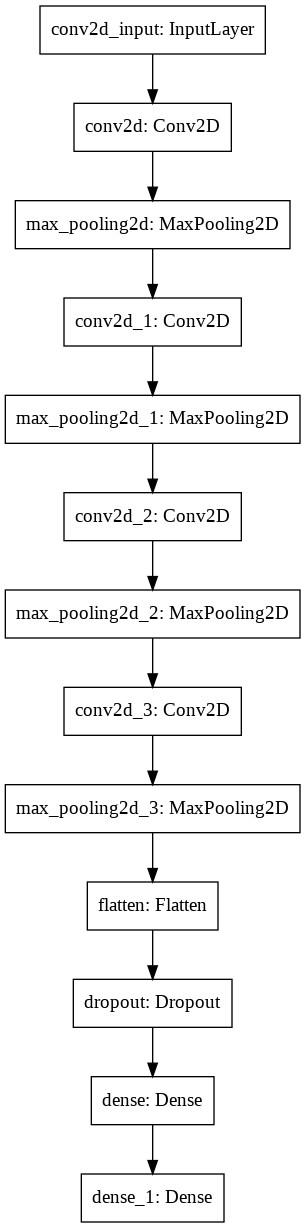

In [13]:
import pydot
keras.utils.plot_model(model)

In [14]:
model.compile(loss='binary_crossentropy',
             optimizer = keras.optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [15]:
model_history = model.fit(train_generator, epochs=100,
                         steps_per_epoch=63,
                         validation_data = validation_generator,
                         validation_steps=32)

Epoch 1/100
63/63 [==============================] - 1251s 19s/step - loss: 0.6959 - acc: 0.5040 - val_loss: 0.6860 - val_acc: 0.6030
Epoch 2/100
63/63 [==============================] - 24s 382ms/step - loss: 0.6921 - acc: 0.5235 - val_loss: 0.6763 - val_acc: 0.5950
Epoch 3/100
63/63 [==============================] - 24s 382ms/step - loss: 0.6851 - acc: 0.5465 - val_loss: 0.6721 - val_acc: 0.5770
Epoch 4/100
63/63 [==============================] - 24s 388ms/step - loss: 0.6739 - acc: 0.5665 - val_loss: 0.8551 - val_acc: 0.5000
Epoch 5/100
63/63 [==============================] - 24s 385ms/step - loss: 0.6673 - acc: 0.5815 - val_loss: 0.6456 - val_acc: 0.6060
Epoch 6/100
63/63 [==============================] - 24s 382ms/step - loss: 0.6527 - acc: 0.5970 - val_loss: 0.6256 - val_acc: 0.6520
Epoch 7/100
63/63 [==============================] - 24s 389ms/step - loss: 0.6439 - acc: 0.6185 - val_loss: 0.6520 - val_acc: 0.5940
Epoch 8/100
63/63 [==============================] - 24s 380ms

In [16]:
model_history.params

{'epochs': 100, 'steps': 63, 'verbose': 1}

In [17]:
model_history.history

{'acc': [0.5040000081062317,
  0.5235000252723694,
  0.546500027179718,
  0.5665000081062317,
  0.5814999938011169,
  0.597000002861023,
  0.6184999942779541,
  0.6330000162124634,
  0.628000020980835,
  0.6520000100135803,
  0.6740000247955322,
  0.6489999890327454,
  0.6644999980926514,
  0.6830000281333923,
  0.6765000224113464,
  0.6759999990463257,
  0.6765000224113464,
  0.7089999914169312,
  0.7055000066757202,
  0.7039999961853027,
  0.6995000243186951,
  0.7064999938011169,
  0.7045000195503235,
  0.7139999866485596,
  0.7039999961853027,
  0.7200000286102295,
  0.7239999771118164,
  0.718999981880188,
  0.7254999876022339,
  0.7204999923706055,
  0.734000027179718,
  0.7310000061988831,
  0.7195000052452087,
  0.7360000014305115,
  0.7315000295639038,
  0.7275000214576721,
  0.7459999918937683,
  0.7450000047683716,
  0.7524999976158142,
  0.7480000257492065,
  0.7559999823570251,
  0.7425000071525574,
  0.7475000023841858,
  0.7749999761581421,
  0.7484999895095825,
  0.7455

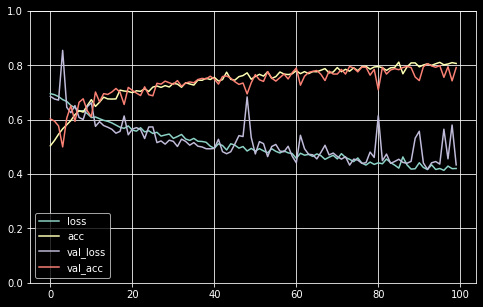

In [18]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
model.save('CNN_Sequential_Model_Cat_and_Dog_Augmented_Classifier.h5')